In [23]:
import math
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns

In [24]:
df = pd.read_csv ('CSI_6_ARI_CW_23_24_25.csv')

In [25]:
print(f"Dataset Shape: {df.shape}")
print(f"Number Of Rows: {df.shape[0]}")
print(f"Number Of Columns: {df.shape[1]}")

Dataset Shape: (30000, 25)
Number Of Rows: 30000
Number Of Columns: 25


In [26]:
df.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98813062,1,good,Green Car,good,good,Convinient,excellent,excellent,excellent,...,good,excellent,Female,Loyal Customer,47.0,Personal Travel,Eco,721,0.0,4.0
1,98871729,0,acceptable,Ordinary,acceptable,acceptable,Convinient,excellent,acceptable,excellent,...,good,excellent,Female,disloyal Customer,9.0,Business travel,Eco,2950,38.0,28.0
2,98893437,1,acceptable,Green Car,acceptable,NaN,manageable,good,good,excellent,...,excellent,good,Female,Loyal Customer,34.0,Business travel,Business,871,0.0,0.0
3,98860750,0,poor,Ordinary,poor,poor,need improvement,excellent,poor,excellent,...,excellent,excellent,Male,disloyal Customer,39.0,NaN,Business,1768,0.0,0.0
4,98803703,0,acceptable,Ordinary,acceptable,acceptable,manageable,acceptable,acceptable,acceptable,...,acceptable,acceptable,Female,Loyal Customer,31.0,Business travel,Eco,2812,0.0,0.0


In [27]:
df.drop('ID', axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       30000 non-null  int64  
 1   Seat_comfort             29985 non-null  object 
 2   Seat_Class               30000 non-null  object 
 3   Arrival_time_convenient  27198 non-null  object 
 4   Catering                 27240 non-null  object 
 5   Platform_location        29991 non-null  object 
 6   Onboardwifi_service      29991 non-null  object 
 7   Onboard_entertainment    29994 non-null  object 
 8   Online_support           29982 non-null  object 
 9   Onlinebooking_Ease       29988 non-null  object 
 10  Onboard_service          27621 non-null  object 
 11  Leg_room                 29975 non-null  object 
 12  Baggage_handling         29955 non-null  object 
 13  Checkin_service          29978 non-null  object 
 14  Cleanliness           

In [29]:
from sklearn.impute import SimpleImputer

# Assuming df is your original DataFrame

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')

# Create a new DataFrame to hold the imputed values with original data types preserved
df_imputed = df.copy()

# Impute each column separately to preserve the data type
for column in df.columns:
    # Reshape df[column] to fit imputer input requirement, which is 2D
    col_values = df[column].values.reshape(-1, 1)
    # Impute the missing values
    imputed_data = imputer.fit_transform(col_values)
    # Flatten the array and preserve original data type
    df_imputed[column] = pd.Series(imputed_data.flatten(), index=df.index).astype(df[column].dtype)

# Check if any nulls remain
nulls_after_imputation = df_imputed.isnull().sum()

# Override df with the imputed DataFrame
df = df_imputed

# Check if the imputation was successful
print(nulls_after_imputation)


Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64


In [30]:

# List of columns to convert to native Python int type
int_columns = ['Travel_Distance', 'Age', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins']

# Convert binary columns including Overall_Experience to categorical with 0 and 1 values
binary_columns_with_mapping = {
    'Overall_Experience': {0: 0, 1: 1},  # Explicitly adding Overall_Experience here
    'Seat_Class': {'Green Car': 1, 'Ordinary': 0},
    'Gender': {'Female': 0, 'Male': 1},
    'TypeTravel': {'Personal Travel': 0, 'Business travel': 1},
    'Travel_Class': {'Eco': 0, 'Business': 1},
    'CustomerType': {'Loyal Customer': 0, 'disloyal Customer': 1}

}

# Convert object columns to categorical
categorical_columns = [
    'Seat_comfort', 'Arrival_time_convenient', 'Catering', 'Platform_location',
    'Onboardwifi_service', 'Onboard_entertainment', 'Online_support', 
    'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling', 
    'Checkin_service', 'Cleanliness', 'Online_boarding',
]

# Convert int columns to integer and round if necessary
for col in int_columns:
    df[col] = df[col].round().astype(int)

# Convert binary columns to categorical using their mapping
for col, mapping in binary_columns_with_mapping.items():
    df[col] = df[col].map(mapping).astype('bool')

# Convert categorical columns
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [31]:
from sklearn.model_selection import train_test_split

# 'Overall_Experience' is the column that indicates if the customer is satisfied (1) or not (0)
X = df.drop(['Overall_Experience'], axis=1)  # Drop  column to avoid data leakage
y = df['Overall_Experience']  # Use the column indicating satisfaction as the target

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# from sklearn.preprocessing import OrdinalEncoder
# import pandas as pd

# custom_order = {
#     'Seat_comfort': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Arrival_time_convenient': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Catering': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Platform_location': ['Inconvinient', 'manageable', 'need improvement', 'Convinient', 'very convinient'],
#     'Onboardwifi_service': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Onboard_entertainment': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Online_support': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Onlinebooking_Ease': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Onboard_service': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Leg_room': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Baggage_handling': ['poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Checkin_service': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Cleanliness': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Online_boarding': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],

# }

# # Initialize OrdinalEncoder with custom order
# ordinal_encoder = OrdinalEncoder(categories=[custom_order[col] for col in custom_order.keys()])
# ordinal_columns = list(custom_order.keys())  # Define ordinal columns

# X_train[ordinal_columns] = ordinal_encoder.fit_transform(X_train[ordinal_columns])  # Encode ordinal columns
# X_test[ordinal_columns] = ordinal_encoder.transform(X_test[ordinal_columns])  # Encode ordinal columns

# # One-hot encode non-ordinal columns
# non_ordinal_columns = ['Gender']
# X_train = pd.get_dummies(X_train, columns=non_ordinal_columns, drop_first=True)
# X_test = pd.get_dummies(X_test, columns=non_ordinal_columns, drop_first=True)


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 21753 to 23654
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Seat_comfort             24000 non-null  category
 1   Seat_Class               24000 non-null  bool    
 2   Arrival_time_convenient  24000 non-null  category
 3   Catering                 24000 non-null  category
 4   Platform_location        24000 non-null  category
 5   Onboardwifi_service      24000 non-null  category
 6   Onboard_entertainment    24000 non-null  category
 7   Online_support           24000 non-null  category
 8   Onlinebooking_Ease       24000 non-null  category
 9   Onboard_service          24000 non-null  category
 10  Leg_room                 24000 non-null  category
 11  Baggage_handling         24000 non-null  category
 12  Checkin_service          24000 non-null  category
 13  Cleanliness              24000 non-null  category
 14  Online_

In [34]:
from sklearn.preprocessing import StandardScaler



# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the specified integer columns only
X_train[int_columns] = scaler.fit_transform(X_train[int_columns])

# Transform the test data using the scaler fitted on the training data
X_test[int_columns] = scaler.transform(X_test[int_columns])


In [35]:
import pandas as pd

# Apply one-hot encoding to categorical columns in both X_train and X_test
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=False)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=False)

# Ensure consistency in columns between X_train and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train.head()

,Seat_Class,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,...,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
21753,True,True,False,-1.150529,True,True,1.680740,-0.208164,0.591238,False,...,False,False,True,False,False,False,False,True,False,False
251,True,False,False,-0.820052,False,False,0.408158,-0.234149,-0.136757,False,...,False,True,False,False,False,False,False,False,True,False
22941,True,True,True,0.501853,True,False,0.147415,-0.390061,-0.396755,False,...,False,False,True,False,False,True,False,False,False,False
618,False,True,False,0.171377,True,True,1.394701,-0.182179,-0.396755,False,...,False,False,False,False,True,False,False,False,False,False
17090,False,True,False,-1.282719,False,False,0.902402,-0.390061,-0.396755,False,...,False,False,True,False,False,True,False,False,False,False


PREP

In [36]:
from sklearn.metrics import (accuracy_score, roc_curve, auc, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             precision_recall_curve, average_precision_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    # Fit model
    model = classifier.fit(X_train, y_train)
    
    # Predicting class labels for the test set
    y_pred = model.predict(X_test)
    
    # Getting decision scores or probabilities, as applicable
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        # For models that do not have decision_function or predict_proba
        # As a fallback, use predict itself, note: this is not ideal for ROC AUC
        y_scores = y_pred
    
    # Metrics Calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Plotting
    plt.figure(figsize=(12, 4))

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap_score = average_precision_score(y_test, y_scores)
    plt.subplot(1, 3, 2)
    plt.step(recall, precision, where='post', label=f'AP Score: {ap_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()


In [37]:
X_train

,Seat_Class,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,...,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
21753,True,True,False,-1.150529,True,True,1.680740,-0.208164,0.591238,False,...,False,False,True,False,False,False,False,True,False,False
251,True,False,False,-0.820052,False,False,0.408158,-0.234149,-0.136757,False,...,False,True,False,False,False,False,False,False,True,False
22941,True,True,True,0.501853,True,False,0.147415,-0.390061,-0.396755,False,...,False,False,True,False,False,True,False,False,False,False
618,False,True,False,0.171377,True,True,1.394701,-0.182179,-0.396755,False,...,False,False,False,False,True,False,False,False,False,False
17090,False,True,False,-1.282719,False,False,0.902402,-0.390061,-0.396755,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,False,True,False,-0.159100,True,True,-1.850966,2.078542,1.917227,True,...,False,False,False,True,False,False,False,True,False,False
5390,False,False,False,0.435758,True,True,-1.653463,-0.390061,-0.396755,False,...,False,True,False,False,False,True,False,False,False,False
860,False,True,False,0.898425,True,True,-1.138787,-0.390061,-0.396755,False,...,False,False,False,False,False,True,False,False,False,False
15795,False,True,True,-0.093004,True,False,0.043313,-0.182179,0.123241,False,...,False,True,False,False,True,False,False,False,False,False


In [38]:
# Check data types
print(X_train.dtypes)


Seat_Class                             bool
Gender                                 bool
CustomerType                           bool
Age                                 float64
TypeTravel                             bool
                                     ...   
Online_boarding_excellent              bool
Online_boarding_extremely poor         bool
Online_boarding_good                   bool
Online_boarding_need improvement       bool
Online_boarding_poor                   bool
Length: 91, dtype: object


Discriminant Analysis

In [40]:
X_train.head()

,Seat_Class,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,...,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
21753,True,True,False,-1.150529,True,True,1.680740,-0.208164,0.591238,False,...,False,False,True,False,False,False,False,True,False,False
251,True,False,False,-0.820052,False,False,0.408158,-0.234149,-0.136757,False,...,False,True,False,False,False,False,False,False,True,False
22941,True,True,True,0.501853,True,False,0.147415,-0.390061,-0.396755,False,...,False,False,True,False,False,True,False,False,False,False
618,False,True,False,0.171377,True,True,1.394701,-0.182179,-0.396755,False,...,False,False,False,False,True,False,False,False,False,False
17090,False,True,False,-1.282719,False,False,0.902402,-0.390061,-0.396755,False,...,False,False,True,False,False,True,False,False,False,False


Accuracy: 0.89
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


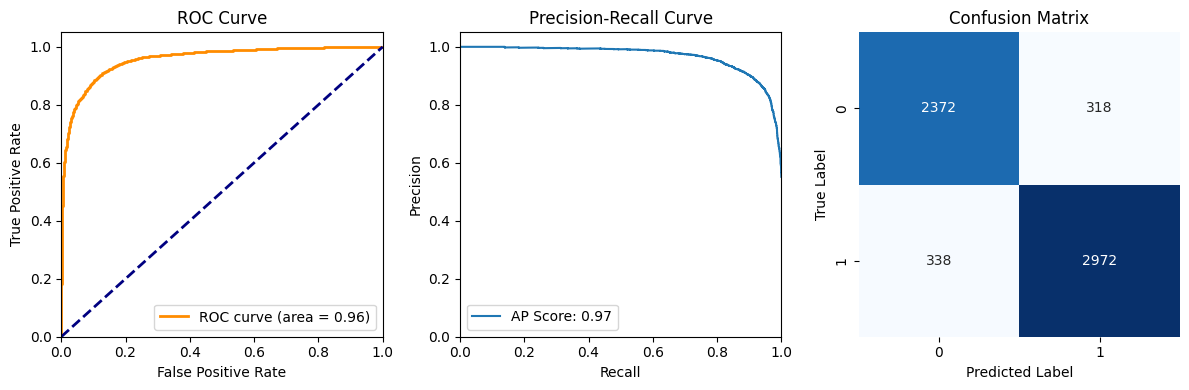

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE

# Load your dataset here
# X_train, y_train = load_your_data()

# Initialize SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize LDA with the LSQR solver
lda = LinearDiscriminantAnalysis(solver='lsqr')

# Train the LDA model on the resampled training data
lda_model = lda.fit(X_train_smote, y_train_smote)


# Assuming you have a test set (X_test, y_test), evaluate your model:
evaluate_model(lda_model, X_train_smote, y_train_smote, X_test, y_test)


In [ ]:
import numpy as np
import pandas as pd

# Fit the model
lda_model = lda.fit(X_train_smote, y_train_smote)

# Retrieve the coefficients or scalings
if len(np.unique(y_train_smote)) == 2:
    # Binary classification
    coefficients = lda_model.coef_[0]
else:
    # Multi-class classification
    coefficients = lda_model.scalings_

# Map coefficients to feature names if you have a DataFrame
feature_names = X_train_smote.columns  # Assuming X_train_smote is a DataFrame
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Importance'])

# Sort the features by their importance (not absolute value)
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

# Get the top 3 and bottom 3 features
top_three_features = feature_importance_sorted.head(3)
bottom_three_features = feature_importance_sorted.tail(3)

# Print the top 3 features
print("Top 3 Important Features:")
print(top_three_features, "\n")

# Print the bottom 3 features
print("Bottom 3 Important Features:")
print(bottom_three_features)


Linear SVM

Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Users\frosty\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\frosty\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\frosty\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\frosty\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.91


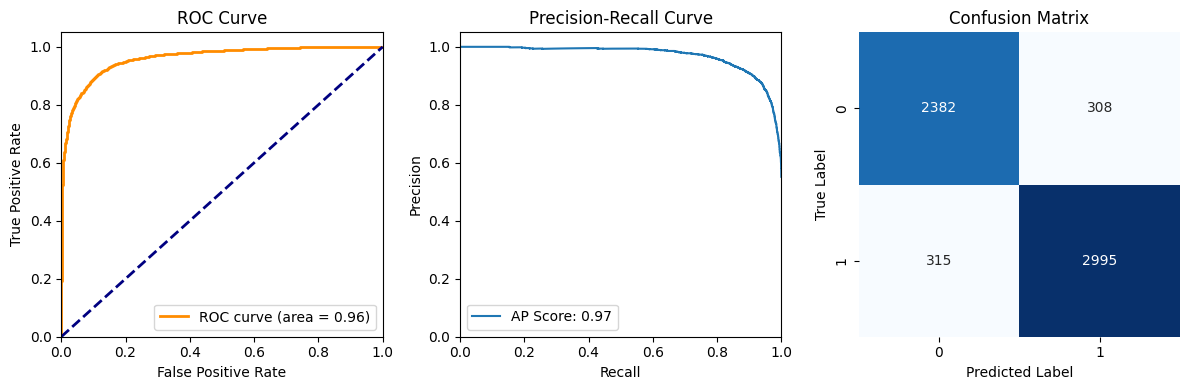

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Resampling with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Setting up the parameter grid
param_grid = {
    'tol': [1, 10]  # Reduced number of values for simplicity
}

# Initialize GridSearchCV with LinearSVC and fewer folds
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on the resampled training data
grid_search.fit(X_train_smote, y_train_smote)

# Best model after grid search
best_svm_model = grid_search.best_estimator_

# Evaluate the best model
evaluate_model(best_svm_model, X_train_smote, y_train_smote, X_test, y_test)

Logistic Regression

Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1 Score: 0.91


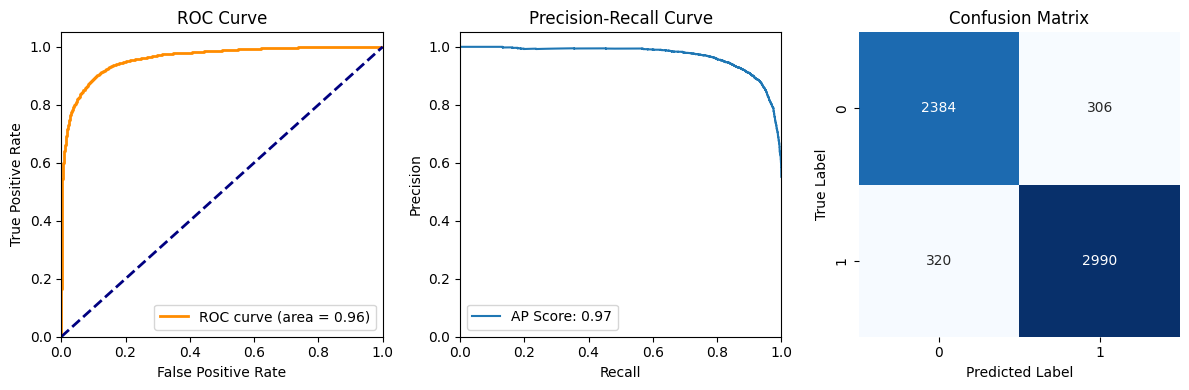

In [44]:
# from sklearn.experimental import enable_halving_search_cv  # noqa
# from sklearn.model_selection import HalvingGridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Define the parameter grid
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
#     'penalty': ['l1', 'l2'],  # Penalty norm
#     'solver': ['liblinear', 'saga']  # Solver for optimization
# }

# # Initialize the Logistic Regression model
# log_reg = LogisticRegression(max_iter=3000)

# # Set up the halving grid search with cross-validation
# halving_grid_search = HalvingGridSearchCV(log_reg, param_grid, cv=5, factor=2, min_resources='exhaust', aggressive_elimination=False)

# # Fit the halving grid search to the data
# halving_grid_search.fit(X_train, y_train)

# # Get the best parameters from halving grid search
# best_params_halving = halving_grid_search.best_params_
# print("Best Parameters (HalvingGridSearchCV):", best_params_halving)

# # Get the best model from halving grid search
# best_log_reg_model_halving = halving_grid_search.best_estimator_

# # Assume evaluate_model is a function that you have already defined
# evaluate_model(best_log_reg_model_halving, X_train, y_train, X_test, y_test)


from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.linear_model import LogisticRegression



# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train_smote, y_train_smote)



# Get the best model from halving grid search

# Assume evaluate_model is a function that you have already defined
evaluate_model(log_reg, X_train_smote, y_train_smote, X_test, y_test)

RBF SVM

Accuracy: 0.94
Precision: 0.96
Recall: 0.94
F1 Score: 0.95


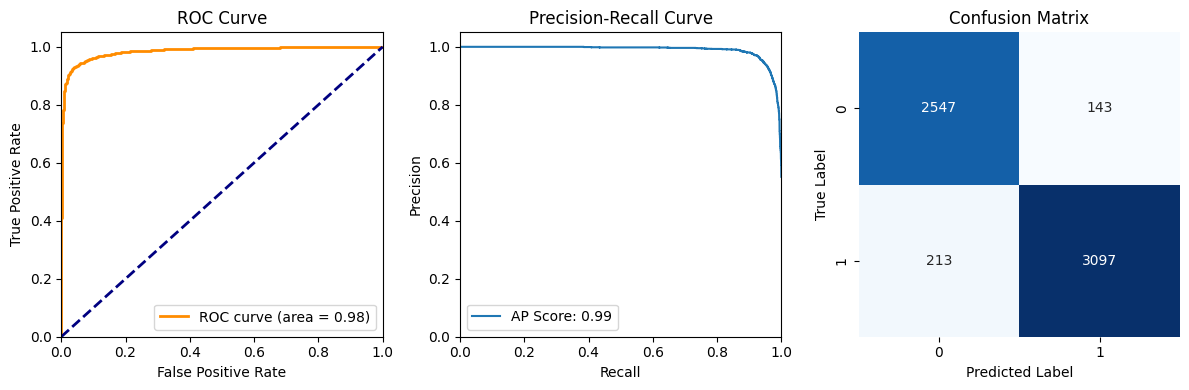

In [46]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from imblearn.pipeline import Pipeline as ImbPipeline
# from imblearn.over_sampling import SMOTE
# import numpy as np

# # Adjusting the pipeline
# pipeline = ImbPipeline([
#     ('pca', PCA(n_components=0.80)),  # More aggressive reduction
#     ('smote', SMOTE(random_state=42, sampling_strategy='auto')),  # Reduced SMOTE impact
#     ('svc', SVC(kernel='rbf', random_state=42))
# ])

# # Simplified parameter grid
# param_grid = {
#     'svc__C': [0.1, 1, 10],  # Fewer options for C
#     'svc__gamma': ['scale', 'auto']  # Simplified gamma options
# }

# # Set up GridSearchCV with fewer CV folds and increased parallel processing
# grid_search = GridSearchCV(
#     pipeline,
#     param_grid=param_grid,
#     cv=2,  # Reduced number of folds
#     verbose=2,
#     n_jobs=-1  # Use all available cores
# )

# # Fitting the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Output best model parameters
# print("Best Parameters:", grid_search.best_params_)


# # Evaluate the best model
# evaluate_model(grid_search.best_estimator_, X_train, y_train, X_test, y_test)



from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the SVC model with an RBF kernel
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1)
rbf_svm_model = rbf_svm.fit(X_train, y_train)

# Evaluate the model using the evaluate_model function
evaluate_model(rbf_svm_model, X_train, y_train, X_test, y_test)

# The evaluate_model function should be defined elsewhere in your code.
# It will print the accuracy, precision, recall, and F1 score of the model.





In [86]:
X_train.head()

,Seat_Class,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,...,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_acceptable,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
21753,True,True,False,-1.150529,True,True,1.680740,-0.208164,0.591238,False,...,False,False,True,False,False,False,False,True,False,False
251,True,False,False,-0.820052,False,False,0.408158,-0.234149,-0.136757,False,...,False,True,False,False,False,False,False,False,True,False
22941,True,True,True,0.501853,True,False,0.147415,-0.390061,-0.396755,False,...,False,False,True,False,False,True,False,False,False,False
618,False,True,False,0.171377,True,True,1.394701,-0.182179,-0.396755,False,...,False,False,False,False,True,False,False,False,False,False
17090,False,True,False,-1.282719,False,False,0.902402,-0.390061,-0.396755,False,...,False,False,True,False,False,True,False,False,False,False


Gradient-boosted Trees

In [146]:
X_train.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Cleanliness,Online_boarding,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Gender_True
21753,1.0,True,1.0,1.0,0.0,4.0,4.0,4.0,4.0,5.0,...,2.0,4.0,False,-1.150529,True,True,1.680740,-0.208164,0.591238,True
251,4.0,True,4.0,3.0,1.0,2.0,4.0,1.0,4.0,4.0,...,4.0,2.0,False,-0.820052,False,False,0.408158,-0.234149,-0.136757,False
22941,4.0,True,5.0,5.0,1.0,5.0,5.0,5.0,5.0,2.0,...,2.0,5.0,True,0.501853,True,False,0.147415,-0.390061,-0.396755,True
618,5.0,False,5.0,5.0,4.0,3.0,5.0,4.0,5.0,5.0,...,5.0,3.0,False,0.171377,True,True,1.394701,-0.182179,-0.396755,True
17090,2.0,False,5.0,2.0,1.0,5.0,2.0,1.0,5.0,1.0,...,2.0,5.0,False,-1.282719,False,False,0.902402,-0.390061,-0.396755,True


Accuracy: 0.94
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


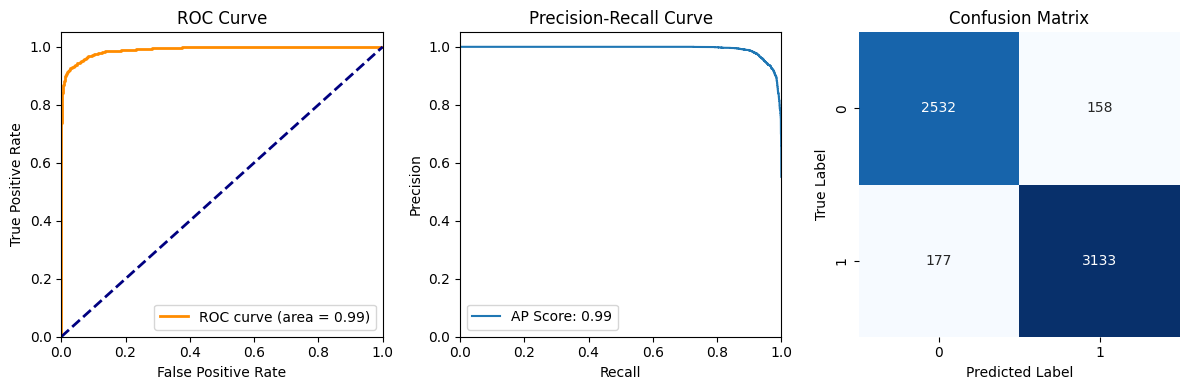

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameters and their ranges
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
gbc = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_dist,
                                   n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Perform Random Search
random_search.fit(X_train, y_train)

# Use the best estimator to evaluate model
best_gbc = random_search.best_estimator_
evaluate_model(best_gbc, X_train, y_train, X_test, y_test)
